## Исследование данных о российском кинопрокате

 Нам предстоит изучить данные о российском кино. На основе изученных данных мы выявим текущие тренды. Внимательно посмотрим на фильмы с господдержкой, установим насколько такие фильмы интересны зрителю. А так же узнаем о самых прибыльных и самых провальных для проката годах, какие жанры сейчас наиболее популярны и о других интересных наблюдениях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

In [6]:
import pandas as pd
pd.set_option('display.max_columns', 20) 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn

 Прочитаем два датафрейма и сохраним их в переменные. Для объединения двух датафреймов посмотрим информацию по ним. объединение будем осуществлять по столбцу 'puNumber'. Мы видим что в двух таблицах у этого столбца разный тип. Поэтому для дальнейшего объединения изменим тип столбца в 'puNumber' в датафрейме mkrf_shows. И после этого объединим данные.

In [7]:
mkrf_movies=pd.read_csv('mkrf_movies.csv')
mkrf_shows=pd.read_csv('mkrf_shows.csv')
mkrf_movies.info()
mkrf_shows.info()
mkrf_shows['puNumber']=mkrf_shows['puNumber'].astype('str')
mkrf_movies=mkrf_movies.merge(mkrf_shows, on='puNumber', how='outer')
mkrf_movies.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Изменение типов данных

 Смотрим информацию по датафрейму. Изучаем типы данных.
 
 Столбец 'show_start_date' меняем на тип временной.
 
 Смотрим уникальные значения по столбцу 'ratings'. Видим среди чисел проценты. Логично предположить что проценты это те жи оценки рейтинга по примеру 100%=10. Исходя из этого меняем проценты на соответствующие оценки. После этого изменим тип столбца на float.
 
 Смотрим уникальные значения по столбцу 'puNumber'. Среди номеров прокатных удостоверений видим одно значение "нет". Предположим что в данном случае прокатного удостоверения небыло и заменим значение на 0. После этого меняем тип столбца на 'int'.
 

In [8]:
mkrf_movies.info()
mkrf_movies['show_start_date']=pd.to_datetime(mkrf_movies['show_start_date'],format='%Y-%m-%dT%H:%M:%S')
mkrf_movies['ratings'].unique()
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('99%',9.9)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('28%',2.8)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('97%',9.7)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('83%',8.3)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('64%',6.4)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('91%',9.1)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('94%',9.4)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('62%',6.2)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('79%',7.9)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('90%',9.0)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('98%',9.8)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('19%',1.9)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('88%',8.8)
mkrf_movies['ratings']=mkrf_movies['ratings'].replace('89%',8.9)
mkrf_movies['ratings']=mkrf_movies['ratings'].astype('float')
mkrf_movies['puNumber'].unique()
mkrf_movies['puNumber']=mkrf_movies['puNumber'].replace('нет',0)
mkrf_movies['puNumber']=mkrf_movies['puNumber'].astype('int')
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

#### Шаг 2.2. Изучим пропуски и избавимся от них
 
 - Пропуски в столбце страны производителя. Эти данные необходимы для дальнейшего исследования. Так как пропуском незначительное количество, мы просто избавися от них.
 
 - Пропуски в столбцах с указанием объёма возвратных средств государственной поддержки, объёма невозвратных средств государственной поддержки и общего бюджета фильма. В этих столбцах очень большое количество пропусков, что может критично сказаться на результатах исследования. Предположим что пропуски в этих колонках возникли по той причине, государственная поддержка не осуществлялась и заполним пропуски 0.
 
 - Пропуски в стоблбце с указанием источника государственного финансирования. В этих столбцах очень большое количество пропусков, что может критично сказаться на результатах исследования. Предположим что пропуски в этих колонках возникли по той причине, государственная поддержка не осуществлялась и заполним пропуски словом "нет". 
 
 - Пропуски в Столбце студии-производитель. В данном случае мы не можем восстановить пропущенные данные, но это не сильно повлияет на ход исследования. Поэтому заменим пропуск на "неизвестна".
 
 - Пропуски в столбце продюсер и директор. В данном случае мы не можем восстановить пропущенные данные, но это не сильно повлияет на ход исследования. Поэтому заменим пропуск на "неизвестен".
 
 - Пропуски в столбцах с указанием сборов в рублях и рейтинга. Пропуски в данных столбцах необходимы для дальнейшего исследования. Удалить пропущенные данные мы не можем, т.к. их значительно больше 10%. Будем считать что сборы и рейтинг не указамы и по той причине что не выходили в прокат, заполним пропуски 0.
 
 - Пропуски в столбце с названием жанра. Пропусков много, просто удалить мы их не можем. Так как восстановить жанр тоже не возможно, заполним значение "неизвестно".
 
 
 После обработки всех пропуском изменим тип столбцов 'budget', refundable_support', 'box_office' и 'nonrefundable_support' на int. 

In [9]:
mkrf_movies.isna().sum()
mkrf_movies['production_country']=mkrf_movies['production_country'].fillna(0)
mkrf_movies.dropna(subset=['production_country'])
mkrf_movies['refundable_support']=mkrf_movies['refundable_support'].fillna(0)
mkrf_movies['nonrefundable_support']=mkrf_movies['nonrefundable_support'].fillna(0)
mkrf_movies['budget']=mkrf_movies['budget'].fillna(0)
mkrf_movies['financing_source']=mkrf_movies['financing_source'].fillna('нет')
mkrf_movies['producer']=mkrf_movies['producer'].fillna('неизвестен')
mkrf_movies['film_studio']=mkrf_movies['film_studio'].fillna('неизвестна')
mkrf_movies['director']=mkrf_movies['director'].fillna('неизвестен')
mkrf_movies['genres']=mkrf_movies['genres'].fillna('неизвестно')
mkrf_movies['budget']=mkrf_movies['budget'].astype('int')
mkrf_movies['refundable_support']=mkrf_movies['refundable_support'].astype('int')
mkrf_movies['nonrefundable_support']=mkrf_movies['nonrefundable_support'].astype('int')
mkrf_movies['box_office']=mkrf_movies['box_office'].fillna(0)
mkrf_movies['box_office']=mkrf_movies['box_office'].astype('int')
mkrf_movies['ratings']=mkrf_movies['ratings'].fillna(0)
mkrf_movies.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

#### Шаг 2.3. Изучим дубликаты.

- Дубликаты в 'puNumber'. Запросим количество дубликатов в номерах прокатного удостоверения. Видим что у нас два дубликата. Избавляеимся от них. После этого образовались пропуски и мы их уберем.

- Дубликаты в названии фильма. Прежде чем запрашивать дубликаты в названии фильма, приведем написание к единому регистру. Далее запросим количество дубликатов. Избавимся от них. Займемся поиском неявных дубликатов. Запросим уникальные названия фильмов. Проанализировав удерем из написания символы которые могут мешать. Исправим разные написания одних и тех же названий. После этого образовались пропуски и мы их уберем.

- В колонке со страной-производителем заменим "-" на ", " для приведения написания к единому виду.


In [10]:
mkrf_movies['puNumber'].duplicated().sum()
mkrf_movies['puNumber']=mkrf_movies['puNumber'].drop_duplicates()
mkrf_movies['puNumber']=mkrf_movies['puNumber'].fillna(0)
mkrf_movies.dropna(subset=['puNumber'])
mkrf_movies['puNumber']=mkrf_movies['puNumber'].astype('int')
mkrf_movies['title'].unique()
mkrf_movies['title']=mkrf_movies['title'].str.lower()
mkrf_movies['title']=mkrf_movies['title'].str.strip()
mkrf_movies['title']=mkrf_movies['title'].str.rstrip()
mkrf_movies['title']=mkrf_movies['title'].str.rstrip('.')
mkrf_movies['title'].duplicated().sum()
mkrf_movies['title']=mkrf_movies['title'].drop_duplicates()
mkrf_movies['title'].sort_values().unique()
mkrf_movies['title']=mkrf_movies['title'].str.replace('10 лет спустя.','10 лет спустя')
mkrf_movies['title']=mkrf_movies['title'].str.replace('"море"','море')
mkrf_movies['title']=mkrf_movies['title'].str.replace(' _','')
mkrf_movies['title']=mkrf_movies['title'].str.replace('_','')
mkrf_movies['title']=mkrf_movies['title'].str.replace('вторая','2')
mkrf_movies['title']=mkrf_movies['title'].str.replace('в поисках немо.','в поисках немо')
mkrf_movies['title']=mkrf_movies['title'].str.replace('на дне .','на дне')
mkrf_movies['title']=mkrf_movies['title'].str.replace('ромео и джульетта /по одноименному произведению у.шекспира/','ромео и джульетта /по мотивам пьесы у.шекспира/')
mkrf_movies['title']=mkrf_movies['title'].str.replace('соседина тропе войны','соседи на тропе войны')
mkrf_movies['title']=mkrf_movies['title'].str.replace('большая игра / big game','большая игра')
mkrf_movies['title']=mkrf_movies['title'].str.replace(' 3d','')
mkrf_movies['title'].duplicated().sum()
mkrf_movies['title']=mkrf_movies['title'].drop_duplicates()
mkrf_movies['title']=mkrf_movies['title'].fillna(0)
mkrf_movies.dropna(subset=['title'])
mkrf_movies=mkrf_movies.query('title!=0')
mkrf_movies['production_country']=mkrf_movies['production_country'].str.replace('-',', ')
mkrf_movies.isna().sum()
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6669 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  6669 non-null   object             
 1   puNumber               6669 non-null   int64              
 2   show_start_date        6669 non-null   datetime64[ns, UTC]
 3   type                   6669 non-null   object             
 4   film_studio            6669 non-null   object             
 5   production_country     6667 non-null   object             
 6   director               6669 non-null   object             
 7   producer               6669 non-null   object             
 8   age_restriction        6669 non-null   object             
 9   refundable_support     6669 non-null   int64              
 10  nonrefundable_support  6669 non-null   int64              
 11  budget                 6669 non-null   int64            

/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/53245871.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  mkrf_movies['title']=mkrf_movies['title'].str.replace('10 лет спустя.','10 лет спустя')
/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/53245871.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  mkrf_movies['title']=mkrf_movies['title'].str.replace('в поисках немо.','в поисках немо')
/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/53245871.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  mkrf_movies['title']=mkrf_movies['title'].str.replace('на дне .','на дне')
/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/53245871.py:21: FutureWarning: The default value of regex will change from True to False in a future version.
  mkrf_movies['title']=mkrf_movies['title

#### Шаг 2.4. Изучим категориальные значения

- Посмотрим категориальные значения. Уберем пробелы слева в столбцах 'producer' и 'type'

- В столбце возрастных ограничений оставим только возраст для простоты восприятия 

In [12]:
mkrf_movies['producer']=mkrf_movies['producer'].str.strip()
mkrf_movies['type']=mkrf_movies['type'].str.strip()
mkrf_movies['age_restriction']=mkrf_movies['age_restriction'].str.replace('- запрещено для детей','')
mkrf_movies['age_restriction']=mkrf_movies['age_restriction'].str.replace('- для детей старше 6 лет','')
mkrf_movies['age_restriction']=mkrf_movies['age_restriction'].str.replace('- для детей старше 12 лет','')
mkrf_movies['age_restriction']=mkrf_movies['age_restriction'].str.replace('- для детей старше 16 лет','')
mkrf_movies['age_restriction']=mkrf_movies['age_restriction'].str.replace('- для любой зрительской аудитории','')
mkrf_movies.head(20)
mkrf_movies.agg('nunique')
mkrf_movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

#### Шаг 2.5. Проверьте количественные значения

Для начала построим гистограммы для столбцов с бюджетом и двумя видами гос поддержки. Видим что в графиках гос поддержки есть подозрительные значения. Есть определенная связь между бюджетом и объёмом возвратных средств государственной поддержки, объёмом невозвратных средств государственной поддержки. Общий бюджет фильма не может быть меньше суммы господдержек. Поэтому уберем такие показатели.

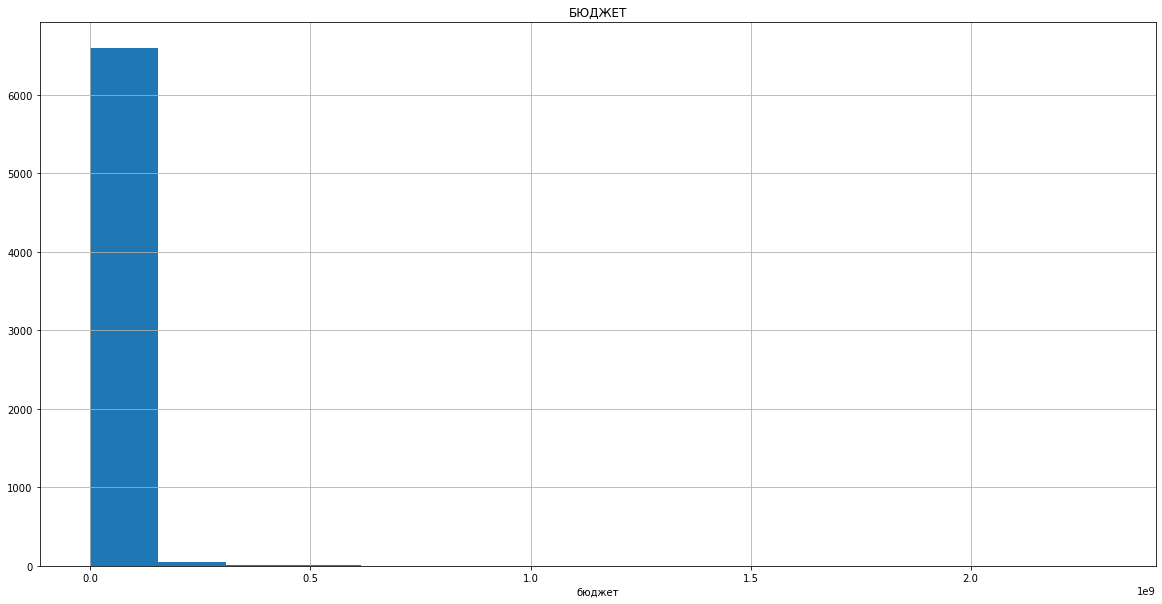

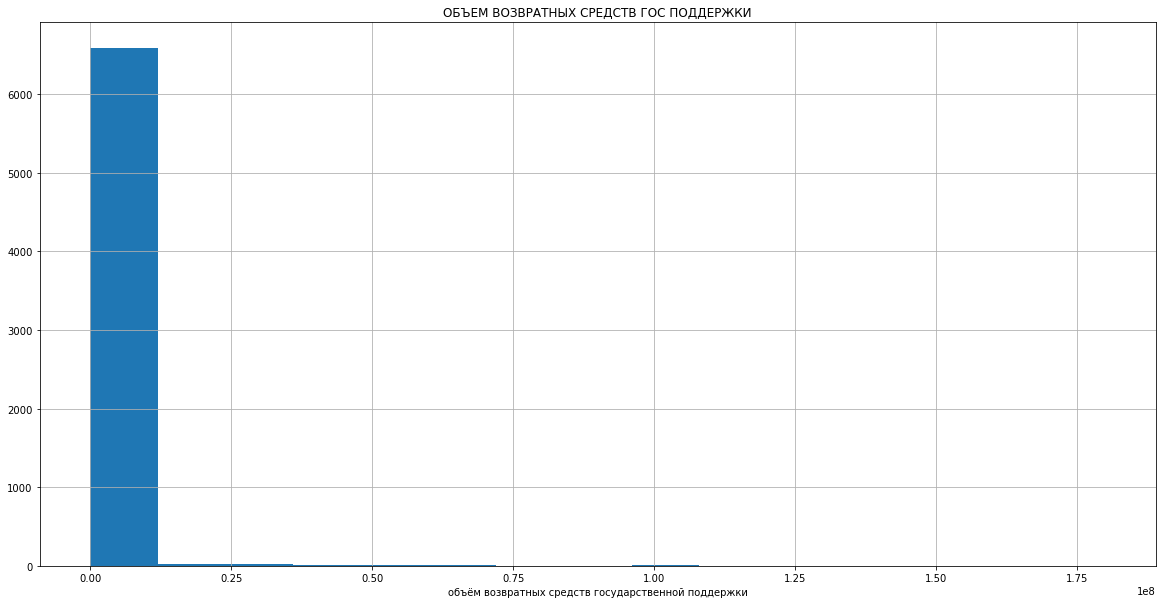

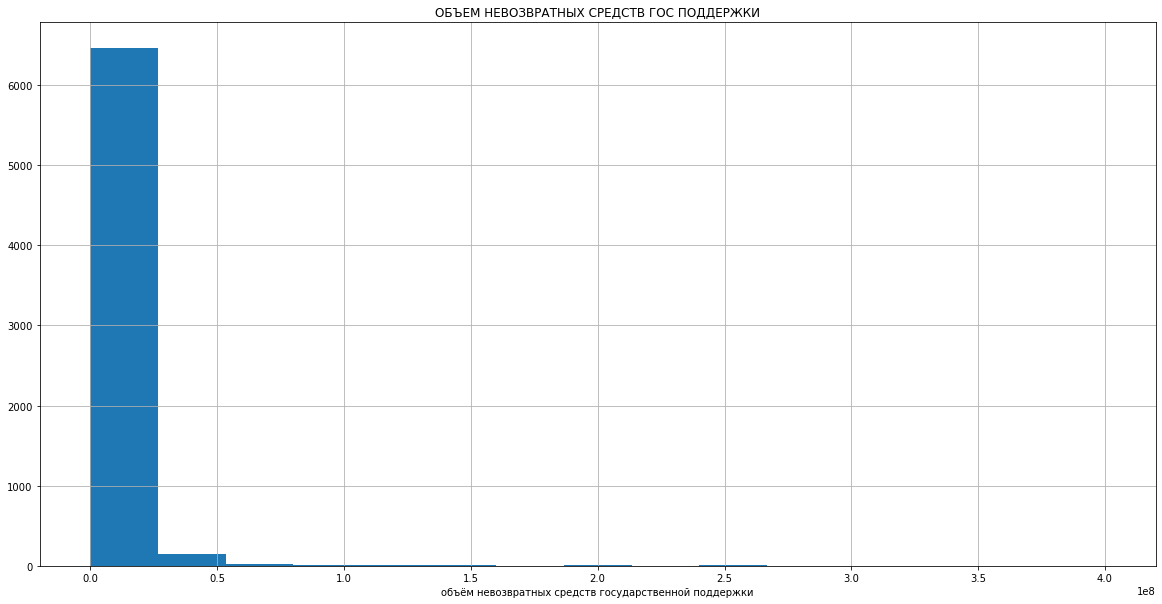

In [13]:
mkrf_movies['budget'].hist(bins=15,figsize=(20, 10))
plt.xlabel('бюджет')
plt.title('БЮДЖЕТ')
plt.show()
mkrf_movies['refundable_support'].hist(bins=15,figsize=(20, 10))
plt.xlabel('объём возвратных средств государственной поддержки')
plt.title('ОБЪЕМ ВОЗВРАТНЫХ СРЕДСТВ ГОС ПОДДЕРЖКИ')
plt.show()
mkrf_movies['nonrefundable_support'].hist(bins=15,figsize=(20, 10))
plt.xlabel('объём невозвратных средств государственной поддержки')
plt.title('ОБЪЕМ НЕВОЗВРАТНЫХ СРЕДСТВ ГОС ПОДДЕРЖКИ')
plt.show()
mkrf_movies.query('budget!=0')
mkrf_movies['general_support']=mkrf_movies['refundable_support']+mkrf_movies['nonrefundable_support']
mkrf_movies=mkrf_movies.query('budget >= general_support')

#### Шаг 2.6. Добавьте новые столбцы





- Создадим столбец с информацией о годе проката. 

In [14]:
mkrf_movies['year']=mkrf_movies['show_start_date'].dt.year

/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/3893234883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkrf_movies['year']=mkrf_movies['show_start_date'].dt.year


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>


Для того чтобы добавить столбцы с основным жанром и главным режиссером напишем функцию, которая разделить слова по запятой и добавит первое в новый столбец.

In [15]:
def main(movie):
    temp = str(movie).split(',')
    new_name = temp[0]
    return new_name
mkrf_movies['main_genre'] = mkrf_movies['genres'].apply(main)
mkrf_movies['main_director'] = mkrf_movies['director'].apply(main)
mkrf_movies.head(20)

/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/4098142502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkrf_movies['main_genre'] = mkrf_movies['genres'].apply(main)
/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/4098142502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkrf_movies['main_director'] = mkrf_movies['director'].apply(main)


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,general_support,year,main_genre,main_director
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+»,0,0,0,нет,7.2,"боевик,драма,мелодрама",0,0,2015,боевик,Кевин Костнер
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестен,«6+»,0,0,0,нет,6.6,"драма,военный",0,0,2016,драма,Е.Матвеев
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+»,0,0,0,нет,6.8,"фантастика,боевик,триллер",0,0,2016,фантастика,Тимур Бекмамбетов
5,остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,неизвестен,«6+»,0,0,0,нет,7.7,драма,0,0,2016,драма,В.Абдрашитов
6,любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,неизвестен,«12+»,0,0,0,нет,8.3,"мелодрама,комедия",2700,0,2013,мелодрама,В.Меньшов
7,любовь и сигареты,221074614,2014-12-29 12:00:00+00:00,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+»,0,0,0,нет,6.6,"мюзикл,мелодрама,комедия",0,0,2014,мюзикл,Джон Туртурро
8,отпетые мошенники,121011416,2016-05-05 12:00:00+00:00,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+»,0,0,0,нет,8.0,"комедия,криминал",0,0,2016,комедия,Эрик Беснард
9,отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,неизвестен,«12+»,0,0,0,нет,7.8,"мелодрама,комедия",0,0,2014,мелодрама,В.Титов
10,превосходство борна /по одноименной новелле ро...,221031416,2016-06-29 12:00:00+00:00,Художественный,"Кеннеди/Маршал Компани, Юниверсал Пикчерз, Гип...",США,Пол Грингросс,"Патрик Кроули, Фрэнк Маршалл, Пол Сэндберг",«16+»,0,0,0,нет,7.7,"боевик,триллер,детектив",0,0,2016,боевик,Пол Грингросс
11,ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,неизвестен,«12+»,0,0,0,нет,7.8,"боевик,драма,приключения",0,0,2014,боевик,М.Туманишвили


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка. Для этого разделим суммарную гос поддержку (которую мы посчитали ранее) на общий бюджет.

In [16]:
mkrf_movies['share_support']=mkrf_movies['general_support']/mkrf_movies['budget']
mkrf_movies['share_support']=mkrf_movies['share_support'].fillna(0)

/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/3557835299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkrf_movies['share_support']=mkrf_movies['general_support']/mkrf_movies['budget']
/var/folders/vj/f4qsmh7s79lb4rf8bsn8nc0m0000gn/T/ipykernel_50200/3557835299.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkrf_movies['share_support']=mkrf_movies['share_support'].fillna(0)


### Шаг 3. Проведите исследовательский анализ данных

Посмотрим Как много фильмов снималось в каждый год. Для этого сделаем сводную таблицу по годам и построим диаграму. Хорошо видно что больше всего фильмов снято в 2019 году, а меньше всего в 2011.
Но стоит посмотреть сколько фильмов из отснятых получили кассовые сборы. Видим что некоторые фильмы выпускались, но не собирали "кассу".
Такие фильмы много. В зависимости от года доля фильмов делающих кассу колеблется от 0,1 до 0,7. Больше всего доля прокатных фильмов из отснятых была в 2017 году. Минимальный показатель в 2010


      movies_released
year                 
2010              747
2011              459
2012              512
2013              585
2014              716
2015              645
2016              760
2017              489
2018              862
2019              877


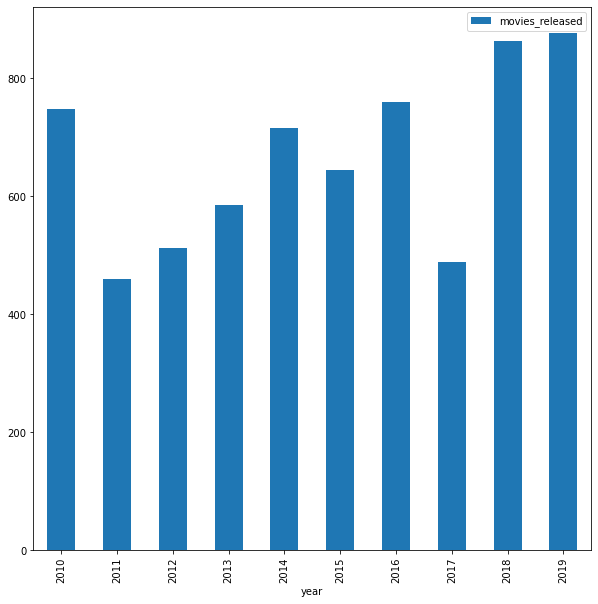

      movies_box_office
year                   
2010                 83
2011                 95
2012                109
2013                170
2014                245
2015                416
2016                491
2017                351
2018                459
2019                515


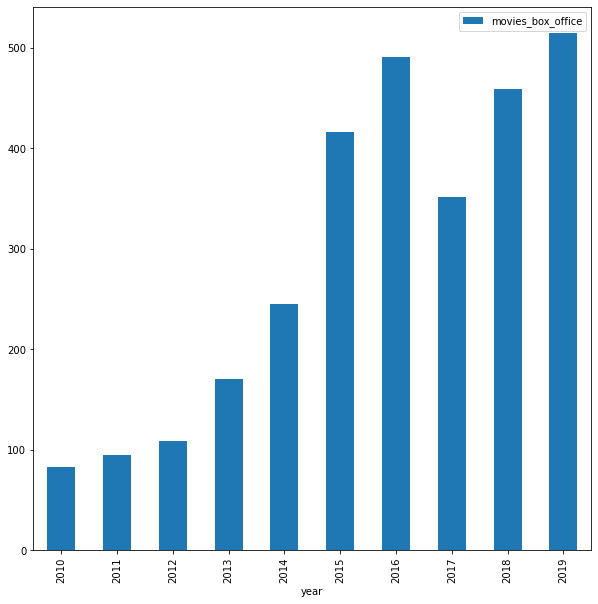

      movies_released  movies_box_office     ratio
year                                              
2010              747                 83  0.111111
2011              459                 95  0.206972
2012              512                109  0.212891
2013              585                170  0.290598
2014              716                245  0.342179
2015              645                416  0.644961
2016              760                491  0.646053
2017              489                351  0.717791
2018              862                459  0.532483
2019              877                515  0.587229


In [17]:
mkrf_movies_year=mkrf_movies.pivot_table(index='year',values='box_office',aggfunc='count')
mkrf_movies_year.columns=['movies_released']
print(mkrf_movies_year)
mkrf_movies_year.plot(kind='bar',figsize=(10, 10))
plt.show()
mkrf_movies_rental=mkrf_movies.query('box_office!=0')
mkrf_movies_rental_plot=mkrf_movies_rental.pivot_table(index='year', values='box_office', aggfunc='count')
mkrf_movies_rental_plot.columns=['movies_box_office']
print(mkrf_movies_rental_plot)
mkrf_movies_rental_plot.plot(kind='bar',figsize=(10, 10))
plt.show()
mkrf_movies_year=mkrf_movies_year.merge(mkrf_movies_rental_plot, on='year', how='outer')
mkrf_movies_year['ratio']=mkrf_movies_year['movies_box_office']/mkrf_movies_year['movies_released']
print(mkrf_movies_year)

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Отлично!
</div>

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?


 Для изучения динамики проката создадим сводную таблицу по годам с указанием суммы сборов. Для большей наглядности построим по этим данным столбчатую диаграмму. 
 
 На диаграмме хорошо видно что произошел значительный рост сборов начиная с 2014 года. Самым прибыльным оказался 2019 год (в этот же год было выпущено и наибольшее количество фильмов), минимальными сборы были в 2010 году. Примечательно что сборы за 2017 год не сильно отстают от максимальных, при этом фильмов в этот год было выпущено значительно меньше чем в 2019, это говорит о том что снятые в 2017 году фильмы были наиболее кассово успешны.

       box_office
year             
2010      2128710
2011     13844110
2012      6405286
2013     29767929
2014   7274198456
2015  30897538168
2016  42606091751
2017  47394842796
2018  47265162879
2019  48228716127


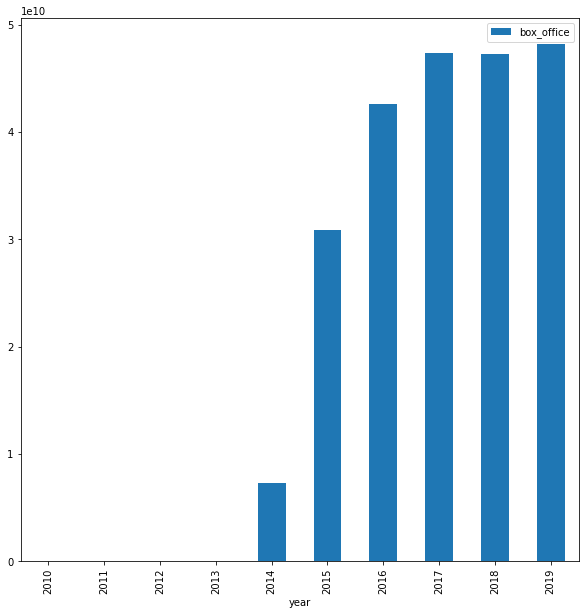

In [18]:
mkrf_movies_sum=mkrf_movies.pivot_table(index='year',values='box_office', aggfunc='sum')
print(mkrf_movies_sum)
mkrf_movies_sum.plot(kind='bar',figsize=(10, 10))
plt.show()

<div class="alert alert-success">
    
<b> Комментарий от ревьюера 2 ✔️</b>

Все верно

</div>

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

Создадим сводную таблицу по годам со средим и медианным значением сборов.

Обратим внимание, что медиана до 2014 года была совсем небольшой. Значительное отличие медианы имеет 2017 год, что еще раз говорит о том что в этом году выходили наиболее кассово успешные фильмы. Средние же значения сильно отличаются от медианных по годам. Это указывает на то, что в годах есть как аномально маленькие сборы, так и фильмы со сборами в несколько раз превышающие сборы остальных. Так же хорошо видно, что с 2014 года стало больше фильмов-рекордсменов (фильмов с большими сборами). Т.е.начиная с 2014 года стали снимать больше блокбастеров. И все так же подтверждается успешность 2017 года.

           mean     median
year                      
2010      25647     2050.0
2011     145727     3000.0
2012      58764     6900.0
2013     175105     3890.0
2014   29690605    28150.0
2015   74272928  4324229.5
2016   86774117  3712390.0
2017  135028042  9876765.0
2018  102974211  8708659.0
2019   93647992  4783481.0


<AxesSubplot:title={'center':'Динамика кассовых сборов'}, xlabel='year'>

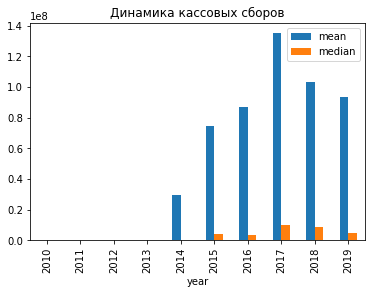

In [19]:
mkrf_movies_plot=mkrf_movies.query('box_office>0').pivot_table(index='year',values='box_office', aggfunc=('mean','median'))
mkrf_movies_plot.columns=['mean','median']
mkrf_movies_plot['mean']=mkrf_movies_plot['mean'].astype('int')
print(mkrf_movies_plot) 
mkrf_movies_plot.plot.bar(title='Динамика кассовых сборов')

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Для изучения влияния возрастных ограничений на суммы сборов создадим сводную таблицу где по годам будет указана сумма сборов в зависимости от возрастного ограничения. Года возьмем с 2015 по 2019. Для наглядности построим диаграмму. На диаграмме хорошо видно, что фильмы с ограничением "+0" наименее кассово успешны и эта тенденция соблюдена в годах. Самыми кассово успешными являются фильмы с рейтингом "+16", единственным исключением стал 2015 год. Но тут могло сказаться то, что в 2015 году фильмов с таким рейтингом просто снималось и выходило в прокат меньше. 

Сделаем отдельный график по годам с количеством фильмов в разных возрастных категориях.

Проанализируем информацию по каждому году.
Нам нужно разобраться, как возрастной рейтинг влияет на сборы, но пока исследование не дает ответа на вопрос. Мы выяснили, что количество фильмов в разных группах отличается, поэтому нам не стоит смотреть на суммарные объемы сборов по категориям. Лучше посчитаем медианные сборы. 

По медианным сборам видно, что успешнее всего в прокате фильмы с ограничением +6.  Следом идут категория +18 и +16. Чуть меньше остальных медиана у фильмов категории +0.


year                    2015         2016         2017         2018  \
age_restriction                                                       
«0+»               273367758    149292912    229598930     32449001   
«12+»            11760605950  11124652612   7851427659  14267291636   
«16+»             7480734273  14289050519  18681698520  14581377420   
«18+»             3172781663   4989951317   8601083556   8470285558   
«6+»              8210048524  12053144391  12031034131   9913759264   

year                    2019  
age_restriction               
«0+»                17746066  
«12+»            12676553663  
«16+»            12741598529  
«18+»            10106754537  
«6+»             12686063332  


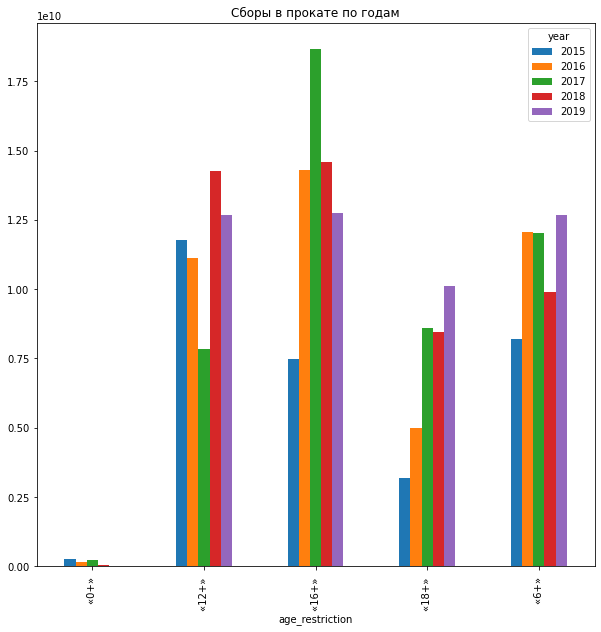

year             2015  2016  2017  2018  2019
age_restriction                              
«0+»               35    36     3     5     3
«12+»              69    78    41    67    83
«16+»             152   165   118   152   173
«18+»             114   144   145   170   177
«6+»               46    68    44    65    79


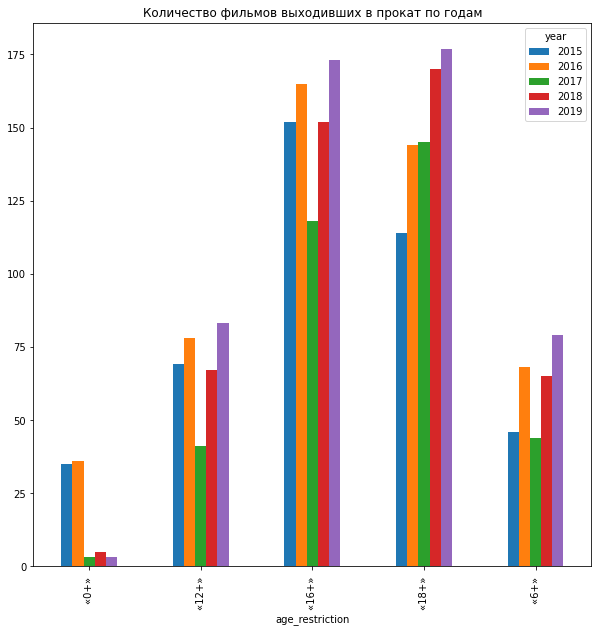

                 box_office
age_restriction            
«0+»              3044759.5
«12+»             5065044.0
«16+»             5186516.0
«18+»             6003100.0
«6+»             13656755.5


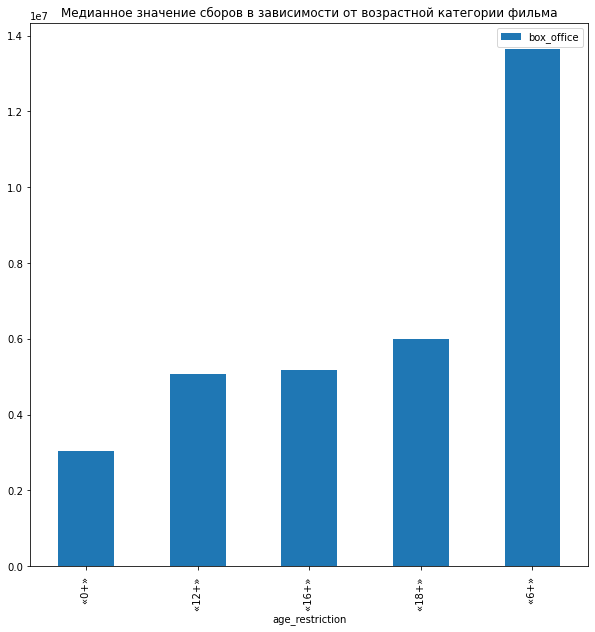

In [20]:
mkrf_movies_age_year=mkrf_movies.query('year!=2010')
mkrf_movies_age_year=mkrf_movies_age_year.query('year!=2011')
mkrf_movies_age_year=mkrf_movies_age_year.query('year!=2012')
mkrf_movies_age_year=mkrf_movies_age_year.query('year!=2013')
mkrf_movies_age_year=mkrf_movies_age_year.query('year!=2014')
mkrf_movies_age=mkrf_movies_age_year.query('box_office>0').pivot_table(index='age_restriction',columns='year',values='box_office', aggfunc='sum')
print(mkrf_movies_age)
mkrf_movies_age.plot(kind='bar',figsize=(10, 10),title='Сборы в прокате по годам')
plt.show()
mkrf_movies_age_sum=mkrf_movies_age_year.query('box_office>0').pivot_table(index='age_restriction',columns='year',values='box_office', aggfunc='count')
print(mkrf_movies_age_sum)
mkrf_movies_age_sum.plot(kind='bar',figsize=(10, 10),title='Количество фильмов выходивших в прокат по годам')
plt.show()
mkrf_movies_age_restriction=mkrf_movies_age_year.query('box_office>0').pivot_table(index='age_restriction',values='box_office', aggfunc='median')
print(mkrf_movies_age_restriction)
mkrf_movies_age_restriction.plot(kind='bar',figsize=(10, 10),title='Медианное значение сборов в зависимости от возрастной категории фильма')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.


 Для исследования фильмов с гос поддержкой создадим отдельную таблицу таких фильмов.
 
 Посмотрим фильмы каких жанров с гос поддержкой собирают самые большие кассы. Для этого сделаем сводную таблицу и построим по ней диаграмму. Хорошо видно, что больше всего сборов у комедий. Следом идет жанр "драма". Затем "мультфильмы" и "спорт". Все остальные жанры имеют более низкие кассовые сборы.
 
 Посмотрим фильмы каких жанров финансируют больше всего. Для этого сделаем сводную таблицу по жанрам с общей суммой финансирования и построим диаграмму. Хорошо видно, что больше всего поддержки у жанра "драма". Следом идет жанр "комедия". Затем "мультфильмы" и "фэнтези". Все остальные жанры имеют более низкое финансирование гос поддержки.
 
 Посмотрим окупаемость фильмов с гос поддержкой. Для наглядности построим диаграмму.
 
 Самыми окупаемыми оказались фильмы в жанре "спорт", окупаемость таких фильмов более чем в 6 раз. Так же окупаемыми оказались " биография"и "комедия", сборы таких фильмов более чем в 4 раза превышают суммы финансирования. 
 
 Далее идут фильмы в жанрах "мультфильмы", "военные", "ужасы", они окупаются более чеи в 2 раза. 
 
 Хуже всего окупаются фильмы с жанром "детские", около 0,044. Плохо окупаемыми будут фильмы и в следующих жанрах: "детективы", "криминал", "мелодрама", "реальное ТВ", "триллер" и "фэнтези". 
 
 Средняя окупаемость чуть больше чем в 1 раз у фильмов остальных жанров.
 
 К сожалению, есть отдельная категория с жанром "неизвестно". Это та категория где жанр был изначально не заполнен. Восстановить жанр в данном случае не возможно.

                   kassa
main_genre              
биография      516883036
боевик         399356494
военный       1017670469
детектив       138547510
детский          3013652
драма         8953379308
история       1455468233
комедия      12182670543
криминал       229054384
мелодрама       44554949
мультфильм    5044931104
мюзикл         101705003
неизвестно    1480414023
приключения   1205596974
реальное ТВ     32721103
семейный       584424748
спорт         2967768387
триллер        475253786
ужасы          710123185
фантастика     679882789
фэнтези        993578220


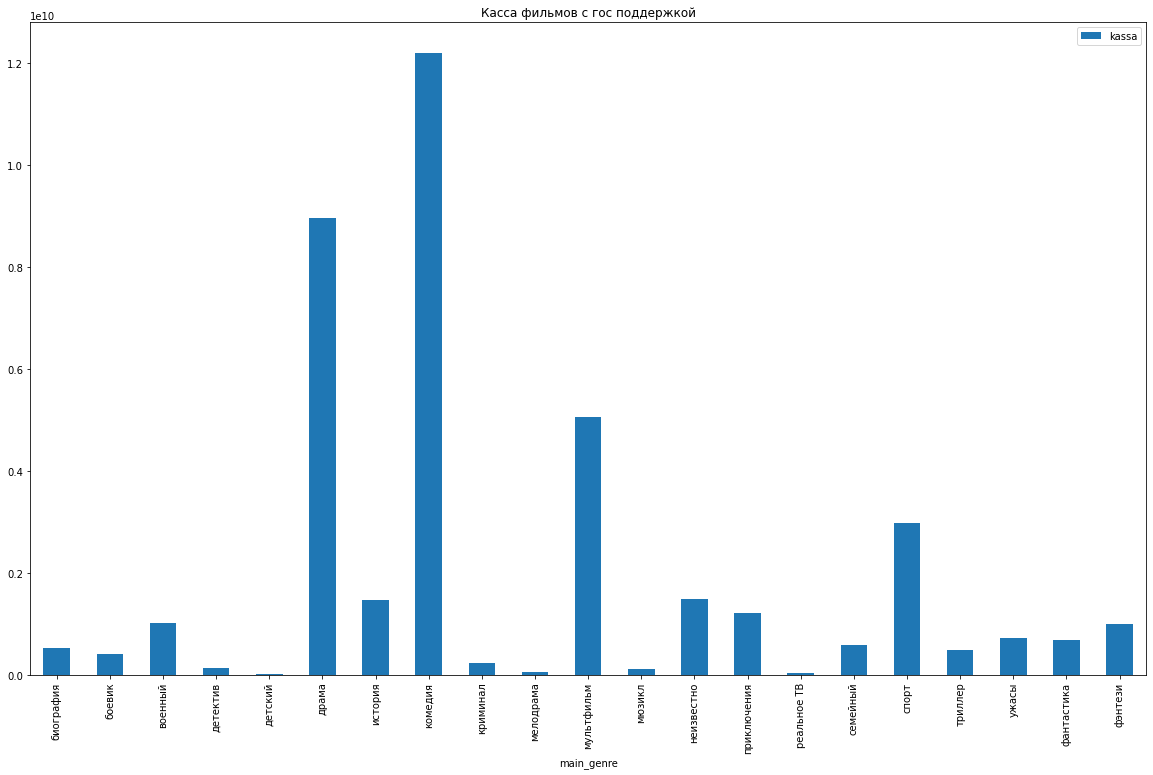

                support
main_genre             
биография     112510000
боевик        254000000
военный       422000866
детектив      485000000
детский       119000000
драма        5124406632
история      1020000000
комедия      2943282945
криминал      250000000
мелодрама     375000000
мультфильм   1931520000
мюзикл        240453119
неизвестно    550000000
приключения   696000000
реальное ТВ    53000000
семейный      339000000
спорт         455000000
триллер       709645285
ужасы         355000000
фантастика    656000000
фэнтези      1002900000


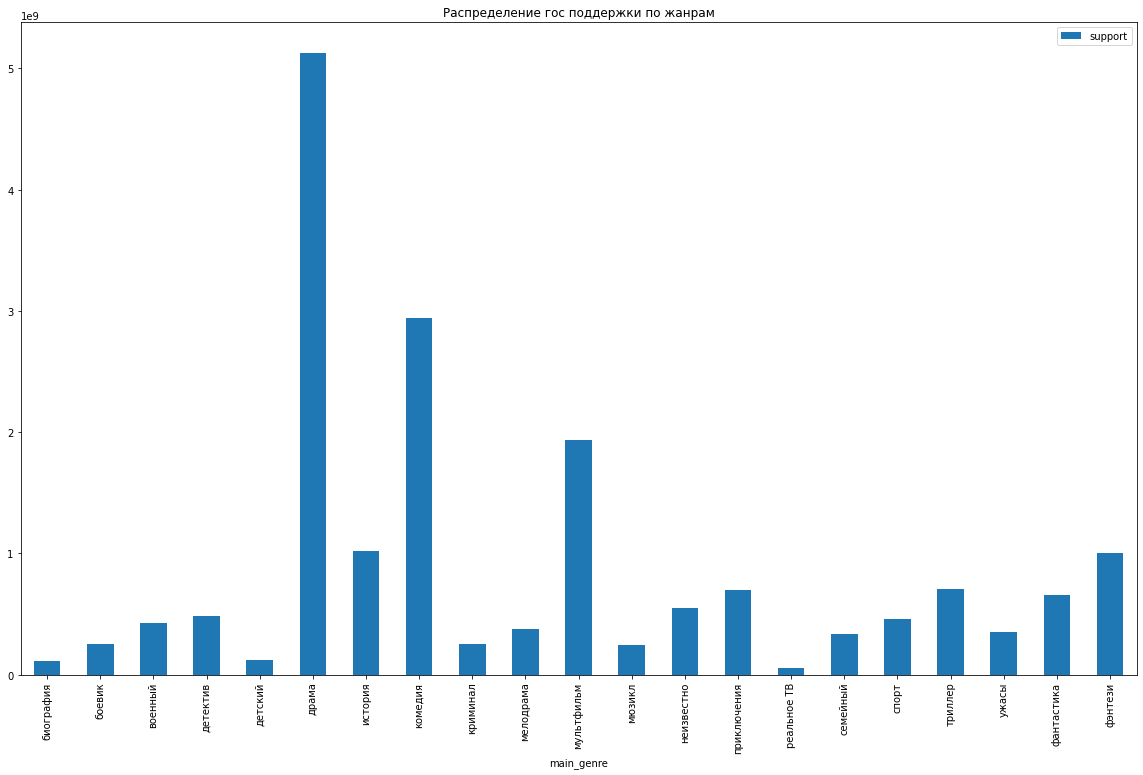

                   kassa     support
main_genre                          
биография      516883036   112510000
боевик         399356494   254000000
военный       1017670469   422000866
детектив       138547510   485000000
детский          3013652   119000000
драма         8953379308  5124406632
история       1455468233  1020000000
комедия      12182670543  2943282945
криминал       229054384   250000000
мелодрама       44554949   375000000
мультфильм    5044931104  1931520000
мюзикл         101705003   240453119
неизвестно    1480414023   550000000
приключения   1205596974   696000000
реальное ТВ     32721103    53000000
семейный       584424748   339000000
спорт         2967768387   455000000
триллер        475253786   709645285
ужасы          710123185   355000000
фантастика     679882789   656000000
фэнтези        993578220  1002900000


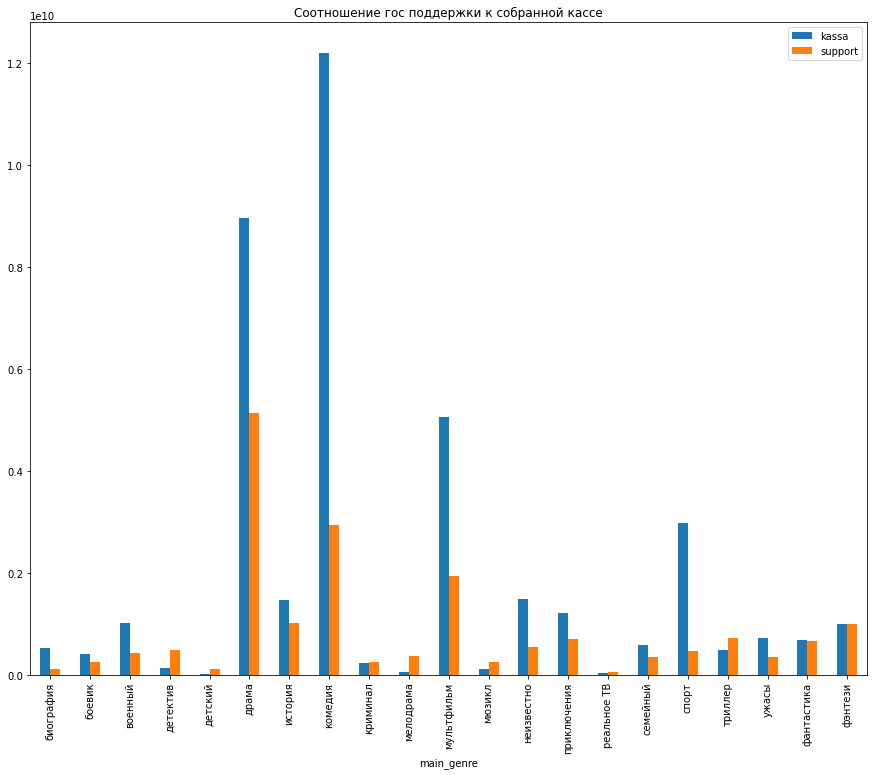

main_genre
биография      4.594108
боевик         1.572270
военный        2.411536
детектив       0.285665
детский        0.025325
драма          1.747203
история        1.426930
комедия        4.139144
криминал       0.916218
мелодрама      0.118813
мультфильм     2.611897
мюзикл         0.422972
неизвестно     2.691662
приключения    1.732180
реальное ТВ    0.617379
семейный       1.723967
спорт          6.522568
триллер        0.669706
ужасы          2.000347
фантастика     1.036407
фэнтези        0.990705
dtype: float64
зависимость сборов от гос поддержки 0.4836915586437713


In [21]:
mkrf_movies_support=mkrf_movies.query('general_support!=0')
mkrf_movies_support_kassa=mkrf_movies_support.pivot_table(index='main_genre', values='box_office', aggfunc='sum')
mkrf_movies_support_kassa.columns=['kassa']
print(mkrf_movies_support_kassa)
mkrf_movies_support_kassa.plot(kind='bar',figsize=(20, 12),title='Касса фильмов с гос поддержкой')
plt.show()
mkrf_movies_support_genres=mkrf_movies_support.pivot_table(index='main_genre', values='general_support', aggfunc='sum') 
mkrf_movies_support_genres.columns=['support']
print(mkrf_movies_support_genres)
mkrf_movies_support_genres.plot(kind='bar',figsize=(20, 12),title='Распределение гос поддержки по жанрам')
plt.show()
mkrf_movies_support_kassa['support']=mkrf_movies_support_genres['support']
print(mkrf_movies_support_kassa)
mkrf_movies_support_kassa.plot(kind='bar',figsize=(15, 12),title='Соотношение гос поддержки к собранной кассе')
plt.show()
print(mkrf_movies_support_kassa['kassa']/mkrf_movies_support_kassa['support'])
print('зависимость сборов от гос поддержки',mkrf_movies_support['box_office'].corr(mkrf_movies_support['general_support']))

 Изучим рейтинги таких фильмов и как он зависит от гос поддержки. 
 
 Самые рейтинговые фильмы в жанре "криминал". Хорошие рейтинги так же у "детские"и "спорт". Самые низкие рейтинги у фильмов "семейные".
 
 Интересно что высокие рейтинги среди жанров "криминал" и "детские" никак не повлияло на окупаемость данных жанров. Возможно это связано с тем, что такие фильмы редко идут в прокате в кинотеатрах(где собирается основная касса), а больше снимаются все же для телевидения.
 
 
 Посмотрим так же соотношение гос поддержки к общиму бюджету в зависимости от жанра. Больше половины бюджета фильма составляет гос поддержка в следующих жанрах: "детективы", "детские", "драма", "комедия", "криминал", "мюзикл", "реальное ТВ", "семейные", "триллеры", "ужасы" и "фэнтези". Съемки фильмов таких жанров больше других зависят от гос поддержек.
 Самыми независимыми будут "биография", "военные", "история", "мультфильмы" и "фантастика". Многие из этих фильмов сами по себе являются более дорогими в производстве, а соответственно их общий бюджет выше. И при том же участии государства, доля гос поддержки теряется в общем бюджете.
 

             ratings
main_genre          
биография       6.90
боевик          6.30
военный         6.40
детектив        6.80
детский         7.25
драма           6.40
история         5.90
комедия         5.70
криминал        8.15
мелодрама       6.05
мультфильм      6.20
мюзикл          6.60
неизвестно      0.00
приключения     5.70
реальное ТВ     5.60
семейный        4.80
спорт           7.00
триллер         5.55
ужасы           5.10
фантастика      6.60
фэнтези         6.95


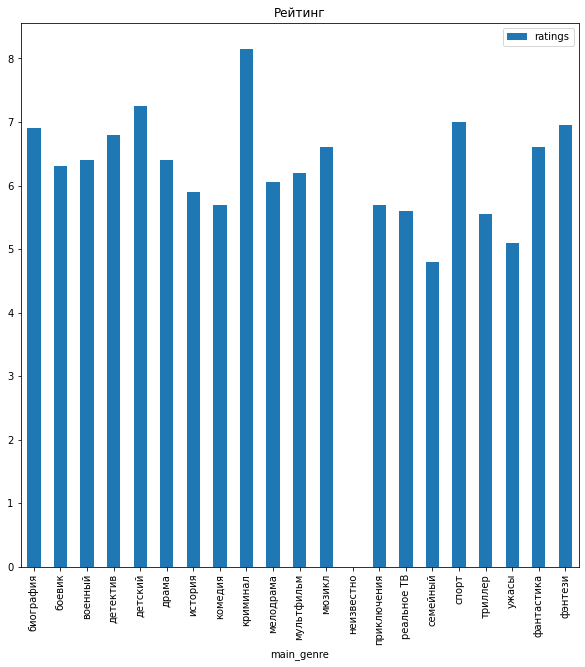

             ratings     support
main_genre                      
биография       6.90   112510000
боевик          6.30   254000000
военный         6.40   422000866
детектив        6.80   485000000
детский         7.25   119000000
драма           6.40  5124406632
история         5.90  1020000000
комедия         5.70  2943282945
криминал        8.15   250000000
мелодрама       6.05   375000000
мультфильм      6.20  1931520000
мюзикл          6.60   240453119
неизвестно      0.00   550000000
приключения     5.70   696000000
реальное ТВ     5.60    53000000
семейный        4.80   339000000
спорт           7.00   455000000
триллер         5.55   709645285
ужасы           5.10   355000000
фантастика      6.60   656000000
фэнтези         6.95  1002900000
зависимость рейтинга от гос поддержки 0.13467303840011613
             share_support
main_genre                
биография         0.210000
боевик            0.409759
военный           0.351354
детектив          0.559303
детский           0.6

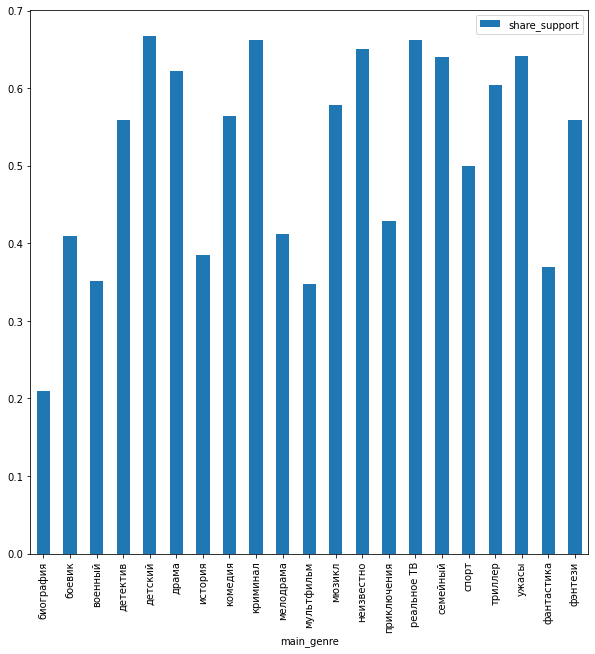

In [22]:
mkrf_movies_ratings=mkrf_movies_support.pivot_table(index='main_genre', values='ratings', aggfunc='median')
print(mkrf_movies_ratings)
mkrf_movies_ratings.plot(kind='bar',figsize=(10, 10),title='Рейтинг')
plt.show()
mkrf_movies_ratings['support']=mkrf_movies_support_kassa['support']
print(mkrf_movies_ratings)
print('зависимость рейтинга от гос поддержки',mkrf_movies_support['ratings'].corr(mkrf_movies_support['general_support']))
mkrf_movies_share=mkrf_movies_support.pivot_table(index='main_genre',values='share_support',aggfunc='median')
print(mkrf_movies_share)
mkrf_movies_share.plot(kind='bar',figsize=(10, 10))
plt.show()

### Шаг 5. Напишите общий вывод

 ## Предобработка данных
 
 Прежде всего мы объединили данные из двух таблиц.
 
 
#### Изменение типов данных

- Прежде всего мы изменили тип данных столбца 'show_start_date' на временной.

- Для того чтобы изменить тип столбца с рейтингом на дробные числа, необходимо было привести записи к единому формату. Запросив уникальные значения из этого столбца мы увидели, что в некоторых строках вместо рейтинга указан процент. Логично предположить что процент можно легко перевести в привычный рейтинг( пример: 96%=9,6). Проводим замену и меняем тип столбца на float.

- Номер прокатного удостоверения. Запросив уникальные значения, видим что в одной строке вместо номера уназано значение "нет". Заменим его на ) и после этого изменим тип столбца на числовой.


#### Работа с пропусками

Запросили информацию о пропусках.

 - Пропуски в столбце страны производителя. Эти данные были  необходимы для дальнейшего исследования. Заполнить пропуски нам было нечем. Так как пропуском незначительное количество, мы просто избавились от них.

- Пропуски в столбцах с указанием объёма возвратных средств государственной поддержки, объёма невозвратных средств государственной поддержки и общего бюджета фильма. В этих столбцах очень большое количество пропусков, что могло критично сказаться на результатах исследования. Предположили, что пропуски в этих колонках возникали по тогда, когда государственная поддержка не осуществлялась. Заполним пропуски 0.

- Пропуски в стоблбце с указанием источника государственного финансирования. В этих столбцах очень большое количество пропусков, что могло критично сказаться на результатах исследования. Предположили что пропуски в этих колонках возникали тогда, когда государственная поддержка не осуществлялась и заполнили пропуски словом "нет".

- Пропуски в Столбце студии-производитель. В данном случае мы не могли восстановить пропущенные данные, но это не сильно повлияло на ход исследования. Поэтому заменим пропуск на "неизвестна".

- Пропуски в столбце продюсер и директор. В данном случае мы не могли восстановить пропущенные данные, но это не сильно повлияло на ход исследования. Поэтому заменим пропуск на "неизвестен".

- Пропуски в столбцах с указанием сборов в рублях и рейтинга. Пропуски в данных столбцах необходимы для исследования. Удалить пропущенные данные мы не могли, т.к. их значительно больше 10%. Будем считать что пропуск в том числе могли возникнуть по причине того что фильм не выходил в прокат, заполним пропуски 0.

- Пропуски в столбце с названием жанра. Пропусков много, просто удалить мы их не могли. Так как восстановить жанр тоже не возможно, заполнили значение "неизвестно".

После обработки всех пропуском изменили тип столбцов 'budget', refundable_support', 'box_office' и 'nonrefundable_support' на 'int'.


#### Дубликаты

- Дубликаты в 'puNumber'. Запросили количество дубликатов в номерах прокатного удостоверения. Видим что у нас два дубликата. Избавляеимся от них. После этого образовались пропуски и мы их убераем.

- Дубликаты в названии фильма. Прежде чем запросить дубликаты в названии фильма, привели написание к единому регистру. Далее запросили количество дубликатов. Избавились от них. Осуществили поиск неявных дубликатов. Запросили уникальные названия фильмов. Проанализировали и  убрали из написания символы которые могут мешать. Исправили разные написания одних и тех же названий. После этого образовались пропуски и мы уберали их.

- В колонке со страной-производителем заменили  "-" на ", " для приведения написания к единому виду.


#### Категориальные значения

Изучив категориальные занчения, убрали  пробелы слева в столбцах 'producer' и 'type'.


#### Количественные значения

Построили гистограммы для столбцов с бюджетом и двумя видами гос поддержки. В графиках гос поддержки есть подозрительные значения. Есть определенная связь между бюджетом и объёмом возвратных средств государственной поддержки, объёмом невозвратных средств государственной поддержки. Общий бюджет фильма не может быть меньше суммы господдержек. Поэтому уберали такие показатели.


#### Добавление новых столбцов

 - Добавили новый столбец с годом проката.
 
 - Добалили столбцы с основным жанром и главным режисером. Для этого использовали написанную функцию, которая заполняла новые столбцы первым значением в столбцах жанра и режиссера.
 
 - Посчитали, какую долю от общего бюджета фильма составляет государственная поддержка. Для этого разделили суммарную гос поддержку (которую мы посчитали ранее) на общий бюджет.
 
 
##  Исследовательский анализ

#### Проанализировали какое количество фильмов выходило по годам и сколько при этом собирало "кассу".

Для этого сделали сводную таблицу по годам и построим диаграму. Хорошо видно что больше всего фильмов снято в 2019 году, а меньше всего в 2011. Так же много фильмов было выпущено в 2018 году.
Так же посмотрели сколько фильмов из отснятых получали кассовые сборы. Увидили, что некоторые фильмы выпускались, но не собирали "кассу". Такие фильмы много. В зависимости от года доля фильмов делающих кассу колеблется от 0,1 до 0,7. Больше всего доля прокатных фильмов из отснятых была в 2017 году. Минимальный показатель в 2010 году.


#### Динамика проката по годам

Для изучения динамики проката создали сводную таблицу по годам с указанием суммы сборов. Для большей наглядности построили по этим данным столбчатую диаграмму. 
 
 - На диаграмме хорошо видно что произошел значительный рост сборов начиная с 2014 года. Самым прибыльным оказался 2019 год (в этот же год было выпущено и наибольшее количество фильмов), минимальными сборы были в 2010 году. Примечательно что сборы за 2017 год не сильно отстают от максимальных, при этом фильмов в этот год было выпущено значительно меньше чем в 2019, это говорит о том что снятые в 2017 году фильмы были наиболее кассово успешны.
 
 - Медиана до 2014 года была совсем небольшой. Значительное отличие медианы имеет 2017 год, что еще раз говорит о том что в этом году выходили наиболее кассово успешные фильмы. Средние же значения сильно отличаются от медианных по годам. Это указывает на то, что в годах есть как аномально маленькие сборы, так и фильмы со сборами в несколько раз превышающие сборы остальных. Так же хорошо видно, что с 2014 года стало больше фильмов-рекордсменов (фильмов с большими сборами). Т.е.начиная с 2014 года стали снимать больше блокбастеров. И все так же подтверждается успешность 2017 года.
 
 
#### Влияние возрастного ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год .
Для изучения влияния возрастных ограничений на суммы сборов мы создали сводную таблицу, где по годам указаны сумма сборов в зависимости от возрастного ограничения. Года взяли с 2015 по 2019. Для наглядности построили диаграмму. На диаграмме хорошо видно, что фильмы с ограничением "+0" наименее кассово успешны и эта тенденция соблюдена из года в год. Самыми кассово успешными являются фильмы с рейтингом "+16", единственным исключением стал 2015 год. Но тут могло сказаться то, что в 2015 году фильмов с таким рейтингом просто снималось и выходило в прокат меньше.

Сделали отдельный график по годам с количеством фильмов в разных возрастных категориях.

Проанализируем информацию по каждому году.
Нам нужно разобраться, как возрастной рейтинг влияет на сборы, но пока исследование не дает ответа на вопрос. Мы выяснили, что количество фильмов в разных группах отличается, поэтому нам не стоит смотреть на суммарные объемы сборов по категориям. Лучше посчитаем медианные сборы. 

По медианным сборам видно, что успешнее всего в прокате фильмы с ограничением +6.  Следом идут категория +18 и +16. Чуть меньше остальных медиана у фильмов категории +0.
 
 #### Исследование фильмов с государственной поддержкой

Для исследования фильмов с гос поддержкой мы создадали отдельную таблицу таких фильмов.

 Для изучения наиболее популярных жанров сделали сводную таблицу и построили по ней диаграмму. Хорошо видно, что больше всего сборов у комедий - 12 182 670 543. Следом идет жанр "драма" - 8 953 379 308. Затем "мультфильмы" и "спорт", 5 044 931 104 и           2 967 768 387. Все остальные жанры имеют более низкие кассовые сборы. Самыйе низкийе сборы при этом у жанра "детский" -            3 013 652. Отдельное внимание обратим на фильмы жанры которых к сожалению были не указаны. Это достаточно большая доля. И этот массив  нельзя не указать со сборами - 1 480 414 023 

Посмотрели фильмы каких жанров финансируют больше всего. Для этого сделали сводную таблицу по жанрам с общей суммой финансирования и построили диаграмму. Хорошо видно, что больше всего поддержки у жанра "драма" - 5 124 406 632. Следом идет жанр "комедия"-         2 943 282 945. Затем "мультфильмы" и "истории", 1 931 520 000 и 1 020 000 000 соответственно. Все остальные жанры имеют более низкое финансирование гос поддержки. Меньше всего оказывается господдержки в жанре "биография" - 112 510 000. Отдельное внимание обратим на фильмы жанры которых к сожалению были не указаны. Это достаточно большая доля. И этот массив  нельзя не указать с гос поддержкой  - 550 000 000 

Оценили окупаемость фильмов с гос поддержкой. Для наглядности построили диаграмму с указанием сборов и гос поддержки.

Самыми окупаемыми оказались фильмы в жанре "спорт", окупаемость таких фильмов более чем в 6 раз. Так же окупаемыми оказались " биография"и "комедия", сборы таких фильмов более чем в 4 раза превышают суммы финансирования.
Далее идут фильмы в жанрах "мультфильмы", "военные", "ужасы", они окупаются более чем в 2 раза.
Хуже всего окупаются фильмы с жанром "детские", около 0,025. Плохо окупаемыми так же будут фильмы и в следующих жанрах: "детективы", "криминал", "мелодрама", "мюзикл","реальное ТВ", "триллер" и "фэнтези".

Средняя окупаемость чуть больше чем в 1 раз у фильмов остальных жанров.

Фильмы с неизвестной категорией имеют окупаемость чуть больше чем в 2,5 раза.
 
Сильной зависимости сборов от гос поддержки не надлюбается. Корреляция составила 0.4836915586437713.
 